In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph, CompGraphRunner
from rpa.io import open_image
from rpa.features import CGFeaturesSIFT

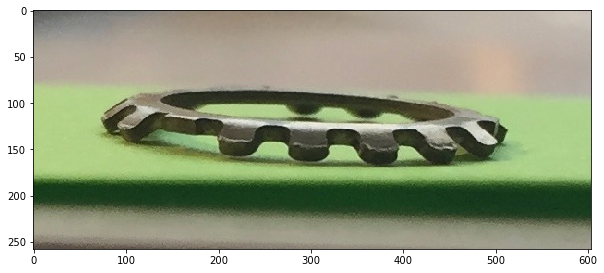

In [4]:
im = open_image(opj(CODE_DIR, 'DATA/IMG/sw_side/sw_side_green.jpg'), gray=False)
plt.figure(figsize=(10, 20))
plt.imshow(im)

In [5]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

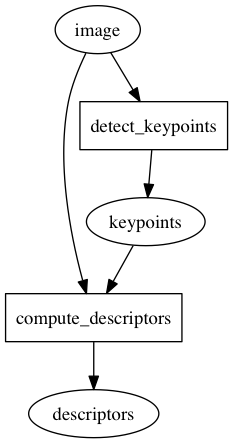

In [6]:
cg_sift = CGFeaturesSIFT()
nxpd.draw(cg_sift.to_networkx())

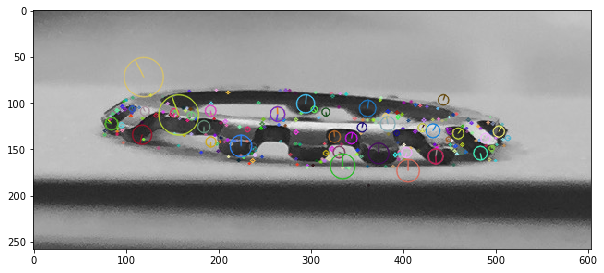

In [7]:
runner_sift = CompGraphRunner(cg_sift)
runner_sift.run(image=im_gray)
im_with_keypoints = cv2.drawKeypoints(im_gray, runner_sift['keypoints'], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 20))
plt.imshow(im_with_keypoints)